<a href="https://colab.research.google.com/github/eyyuptasci/DynamicsOfGenerlizedSpinSystems/blob/main/DYNAMICS_OF_GENERALIZED_COUPLED_SPIN_SYSTEMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DYNAMICS OF GENERALIZED COUPLED SPIN SYSTEMS**


> This code is utilized to find the dynamics of the generlized spin systems described by the $J_{\bar R}, H_{\bar t} : S^2 \times S^2 \rightarrow \mathbb{R}$

*   $J_{\bar R} := R_{1}z_{1} + R_{2}z_{2}$
*   $H_{\bar t} := t_{1}z_{1} + t_{2}z_{2} + t_{3}(x_{1}x_{2} + y_{1}y_{2}) + t_{4}z_{1}z_{2}$

---

>In the first code block, the required libraries are being imported.
>
>In the second code block, definition for the system of equations to solve porjection problem is given.
>
>In the third and fourth code blocks, definition for the algorithm to find the trajectory utilized by projection and visulization of the result is given.
>
>In the fifth and sixth code blocks, definition for the algorithm to find the trajectory wtihout projection and visulization of the result is given.
>
>Last block is the main block that runs the code. First four input variables are $t = (t_{1}, t_{2}, t_{3}, t_{4})$, and the other four input variables are $p^{i} = (z_{1}^{i}, \theta_{1}^{i}, z_{2}^{i}, \theta_{2}^{i})$ respectively.

---

>Some interesting $t$ parameters and initial points are as follows :



1.   When $t_{3} = 0$, z values do not change. Some examples :

  *   $t = (0.25, 0.4, 0, 0.1)$ with $p^{i} = (0.8, \ \frac{π}{4}, -0.4, 0)$, 

2.   The preimage of the $(H,J)$ is double pinched torus when $t = (0.25, 0.25, 0.5, 0)$ with the points satisfying $H = 0$ and $J = 0$. Some examples :

  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (-0.6, \ \frac{π}{2}, 0.6, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (0.6, \arccos(-0.9375), 0.6, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (-0.4, \arccos(-0.136386), -0.6, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (-0.7, \arccos(-0.321246), 0.9, 0)$
  
3. The below points have the same $t$ parameters with double pinched torus, however $(H, J) \neq 0$. Some examples: 

  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (0.6, \arccos(0.61875), 0.6, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (0, \ \frac{π}{4}, 0, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (0.4, π, -0.4, 0)$
  *   $t = (0.25, 0.25, 0.5, 0)$ with $p^{i} = (0.4, \ \frac{π}{7}, 0.4, 0)$

4. The preimage of the $(H,J)$ is single pinched torus when $t = (s, 0, 1-s, 1-s)$ for some $s \in \mathbb{R}$. Some examples:
  *   $t = (0.25, 0, 0.75, 0.75)$ with $p^{i} = (0.7, \arccos(-0.4), 0.4, 0)$
  *   $t = (0.25, 0, 0.75, 0.75)$ with $p^{i} = (-0.4, -2, 0.9, 0)$
  *   $t = (0.25, 0, 0.75, 0.75)$ with $p^{i} = (0.9, \arccos(-0.4842), -0.1, 0)$
  *   $t = (0.25, 0, 0.75, 0.75)$ with $p^{i} = (0.9, \ \frac{π}{2}, -0.9, 0)$
  

In [ ]:
from scipy.optimize import fsolve
import math
import numpy as np
from numpy import sqrt
from sympy import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random

In [ ]:
def projection(p, *T_p0_p_inital):
    t1, t2, t3, t4, x1_0, y1_0, z1_0, x2_0, y2_0, z2_0, x1_i, y1_i, z1_i, x2_i, y2_i, z2_i = T_p0_p_inital  

    return [ 2*(p[0] - x1_0) - 2*p[6]*p[0] - p[8]*t3*p[3], 
             2*(p[1] - y1_0) - 2*p[6]*p[1] - p[8]*t3*p[4],
             2*(p[2] - z1_0) - 2*p[6]*p[2] - p[8]*(t1 + t4*p[5]) - p[9],
             2*(p[3] - x2_0) - 2*p[7]*p[3] - p[8]*t3*p[0],
             2*(p[4] - y2_0) - 2*p[7]*p[4] - p[8]*t3*p[1],
             2*(p[5] - z2_0) - 2*p[7]*p[5] - p[8]*(t1 + t4*p[2]) - p[9],
             p[0]**2 + p[1]**2 + p[2]**2 - 1,
             p[3]**2 + p[4]**2 + p[5]**2 - 1,
             t1*p[2] + t2*p[5] + t3*(p[0]*p[3] + p[1]*p[4]) + t4*p[2]*p[5] - (t1*z1_i + t2*z2_i + t3*(x1_i*x2_i + y1_i*y2_i) + t4*z1_i*z2_i), 
             p[2] + p[5] - z1_i - z2_i           
    ]

In [ ]:
def approximationWithProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i):
  output = []
  z1 = z1i
  z2 = z2i
  theta1 = theta1i
  theta2 = theta2i
  x1i = math.sqrt(1-(z1i*z1i))*math.cos(theta1i)
  y1i = math.sqrt(1-(z1i*z1i))*math.sin(theta1i)
  x2i = math.sqrt(1-(z2i*z2i))*math.cos(theta2i)
  y2i = math.sqrt(1-(z2i*z2i))*math.sin(theta2i) 

  Hbase = (t1*z1i) + (t2*z2i) + (t3*(math.sqrt(1-(z1i*z1i))*math.sqrt(1-(z2i*z2i))*math.cos(theta1i-theta2i))) + (t4*(z1i*z2i))
  Jbase = z1i + z2i;

  i = 0
  h = 0.0001
  while i < 200000:
    tz1 = z1
    tz2 = z2
    ttheta1 = theta1
    ttheta2 = theta2
    x1 = math.sqrt(1-(tz1*tz1))
    x2 = math.sqrt(1-(tz2*tz2))

    #Euler Method
    theta1 = ttheta1 + h*(t1+(t3*(x2*math.cos(ttheta1-ttheta2)*tz1)/x1)+(t4*tz2))
    theta2 = ttheta2 + h*(t2+(t3*(x1*math.cos(ttheta1-ttheta2)*tz2)/x2)+(t4*tz1))
    z1 = tz1 - h*(t3*x1*x2*math.sin(ttheta1-ttheta2))
    z2 = tz2 + h*(t3*x1*x2*math.sin(ttheta1-ttheta2))

    J = z1 + z2
    H = (t1*z1) + (t2*z2) + (t3*(math.sqrt(1-(z1*z1))*math.sqrt(1-(z2*z2))*math.cos(theta1-theta2))) + (t4*(z1*z2))
    
    output.append((tuple((z1, theta1, z2, theta2))))
    if (i % 100 == 0): #Projection
      x1 = math.sqrt(1-(z1*z1))*math.cos(theta1)
      y1 = math.sqrt(1-(z1*z1))*math.sin(theta1)
      x2 = math.sqrt(1-(z2*z2))*math.cos(theta2)
      y2 = math.sqrt(1-(z2*z2))*math.sin(theta2) 
      point = tuple((t1, t2, t3, t4, x1, y1, z1, x2, y2, z2, x1i, y1i, z1i, x2i, y2i, z2i))
      input = [x1, y1, z1, x2, y2, z2, 0, 0, 1, 1]
      newpoint = fsolve(projection, input, args=point) 
      x1, y1, z1, x2, y2, z2, variable1, variable2, variable3, variable4 = newpoint
      theta1 = math.atan2(y1,x1)   
      theta2 = math.atan2(y2,x2)
      #print(H, J)   
    i = i+1
  return output


In [ ]:


def visualizerWithProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i):
  data = approximationWithProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i)
  
  u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
  x = np.cos(u)*np.sin(v)
  y = np.sin(u)*np.sin(v)
  z = np.cos(v)
  
  colorlist = []
  x1list = []
  y1list = []
  z1list = []
  x2list = []
  y2list = []
  z2list = []

  fig1 = plt.figure(figsize=(8, 6), dpi=80)
  ax1 = fig1.add_subplot(projection='3d')
  ax1.plot_wireframe(x, y, z, color="gray")

  fig2 = plt.figure(figsize=(8, 6), dpi=80)
  ax2 = fig2.add_subplot(projection='3d')
  ax2.plot_wireframe(x, y, z, color="gray")
  
  for number in range(200000):
    colorlist.append(number/80 + 70)
  for point in data:
    z1, theta1, z2, theta2 = point
    z1 = z1
    x1 = math.sqrt(1-(z1*z1))*math.cos(theta1)
    y1 = math.sqrt(1-(z1*z1))*math.sin(theta1)
    z2 = z2
    x2 = math.sqrt(1-(z2*z2))*math.cos(theta2)
    y2 = math.sqrt(1-(z2*z2))*math.sin(theta2)
    x1list.append(x1)
    y1list.append(y1)
    z1list.append(z1)
    x2list.append(x2)
    y2list.append(y2)
    z2list.append(z2)
  ax1.scatter(x1list, y1list, z1list, c=colorlist, cmap='rainbow', s=15)
  ax2.scatter(x2list, y2list, z2list, c=colorlist, cmap='rainbow', s=15)
  return True



In [ ]:
def approximationWoProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i):
  output = []
  z1 = z1i
  z2 = z2i
  theta1 = theta1i
  theta2 = theta2i
  x1i = math.sqrt(1-(z1i*z1i))*math.cos(theta1i)
  y1i = math.sqrt(1-(z1i*z1i))*math.sin(theta1i)
  x2i = math.sqrt(1-(z2i*z2i))*math.cos(theta2i)
  y2i = math.sqrt(1-(z2i*z2i))*math.sin(theta2i) 
  Hbase = (t1*z1i) + (t2*z2i) + (t3*(math.sqrt(1-(z1i*z1i))*math.sqrt(1-(z2i*z2i))*math.cos(theta1i-theta2i))) + (t4*(z1i*z2i))
  i = 0
  h = 0.0001
  while i < 200000:
    tz1 = z1
    tz2 = z2
    ttheta1 = theta1
    ttheta2 = theta2
    x1 = math.sqrt(1-(tz1*tz1))
    x2 = math.sqrt(1-(tz2*tz2))
    theta1 = ttheta1 + h*(t1+(t3*(x2*math.cos(ttheta1-ttheta2)*tz1)/x1)+(t4*tz2))
    theta2 = ttheta2 + h*(t2+(t3*(x1*math.cos(ttheta1-ttheta2)*tz2)/x2)+(t4*tz1))
    z1 = tz1 - h*(t3*x1*x2*math.sin(ttheta1-ttheta2))
    z2 = tz2 + h*(t3*x1*x2*math.sin(ttheta1-ttheta2))
    J = z1 + z2
    H = (t1*z1) + (t2*z2) + (t3*(math.sqrt(1-(z1*z1))*math.sqrt(1-(z2*z2))*math.cos(theta1-theta2))) + (t4*(z1*z2)) 
    if (i % 100 == 0): 
      #print(theta1, z1, theta2, z2)
      #print(H, J)
      output.append((tuple((z1, theta1, z2, theta2))))  
    i = i+1
  return output


In [ ]:
def visualizerWoProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i):
  data = approximationWoProjection(t1, t2, t3, t4, z1i, theta1i, z2i, theta2i)
  
  u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
  x = np.cos(u)*np.sin(v)
  y = np.sin(u)*np.sin(v)
  z = np.cos(v)
  
  colorlist = []
  x1list = []
  y1list = []
  z1list = []
  x2list = []
  y2list = []
  z2list = []

  fig1 = plt.figure(figsize=(8, 6), dpi=80)
  ax1 = fig1.add_subplot(projection='3d')
  ax1.plot_wireframe(x, y, z, color="gray")

  fig2 = plt.figure(figsize=(8, 6), dpi=80)
  ax2 = fig2.add_subplot(projection='3d')
  ax2.plot_wireframe(x, y, z, color="gray")
  
  for number in range(2000):
    colorlist.append(number/80 + 70)
  for point in data:
    z1, theta1, z2, theta2 = point
    z1 = z1
    x1 = math.sqrt(1-(z1*z1))*math.cos(theta1)
    y1 = math.sqrt(1-(z1*z1))*math.sin(theta1)
    z2 = z2
    x2 = math.sqrt(1-(z2*z2))*math.cos(theta2)
    y2 = math.sqrt(1-(z2*z2))*math.sin(theta2)
    x1list.append(x1)
    y1list.append(y1)
    z1list.append(z1)
    x2list.append(x2)
    y2list.append(y2)
    z2list.append(z2)
  ax1.scatter(x1list, y1list, z1list, c=colorlist, cmap='rainbow', s=15)
  ax2.scatter(x2list, y2list, z2list, c=colorlist, cmap='rainbow', s=15)
  return True

/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)


True

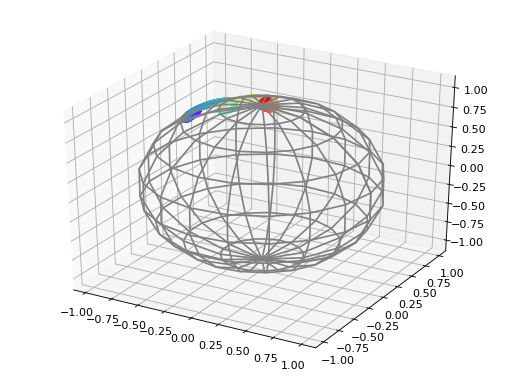

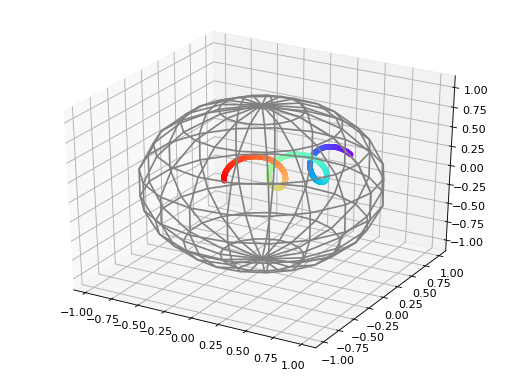

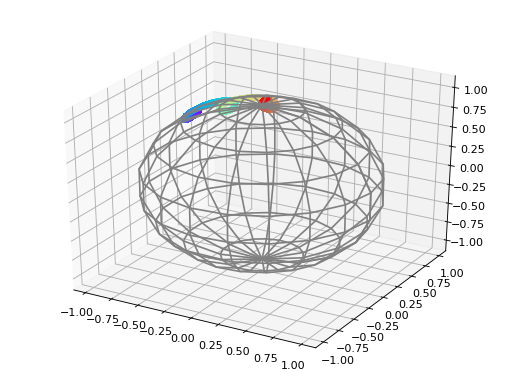

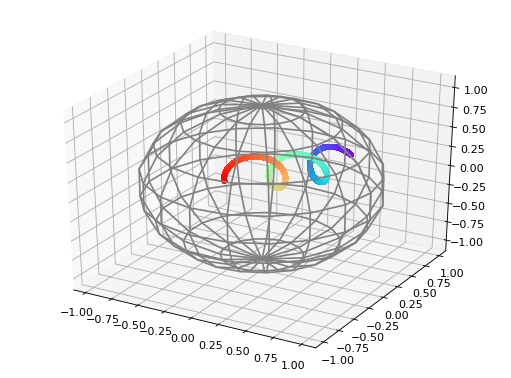

In [ ]:

visualizerWoProjection(0.25, 0.25, 0.5, 0, 0.6, math.acos(-0.9375), 0.6, 0)
visualizerWithProjection(0.25, 0.25, 0.5, 0, 0.6, math.acos(-0.9375), 0.6, 0)
